In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import os
from torchvision.datasets import ImageFolder
import shutil
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms
from torchvision.models import mobilenet_v2
from sklearn.metrics import accuracy_score
from itertools import product
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
!pip install thop
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.neighbors import KNeighborsClassifier



In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



data_dir = '/kaggle/input/colorectal-canc/Dataset 1/Colorectal Cancer '


classes = ['MUS', 'NORM', 'STR']
classes = ['MUS', 'NORM', 'STR']
class_counts = {class_name: 0 for class_name in classes}


for class_name in classes:
    class_path = os.path.join(data_dir, class_name)
    # Count the number of .tif files for each class
    class_counts[class_name] = len([filename for filename in os.listdir(class_path) if filename.endswith('.tif')])

print(class_counts)

images = []
labels = []


for class_name in classes:
    class_path = os.path.join(data_dir, class_name)
    for filename in os.listdir(class_path):
        if filename.endswith('.tif'):
            image_path = os.path.join(class_path, filename)
            image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
            images.append(image)
            labels.append(class_name)


X = np.array(images)
y = np.array(labels)


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)




{'MUS': 2000, 'NORM': 2000, 'STR': 2000}


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 82.9MB/s]


[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.batchnorm.BatchNorm2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.pooling.MaxPool2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
[INFO] Register count_adap_avgpool() for <class 'torch.nn.modules.pooling.AdaptiveAvgPool2d'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
FLOPs: 1823523328.0
Epoch 1/25, Train Loss: 0.9878, Train Accuracy: 0.5327, Validation Loss: 0.8096, Validation Accuracy: 0.6700
Epoch 2/25, Train Loss: 0.7446, Train Accuracy: 0.7319, Validation Loss: 0.6310, Validation Accuracy: 0.7900
Epoch 3/25, Train Loss: 0.6059, Train Accuracy: 0.8117, Validation Loss: 0.5174, Validation Accuracy: 0.8433
Epoch 4/25, Train Loss: 0.5108, Train Accuracy: 0.8492, Validation Loss: 0.4388, V

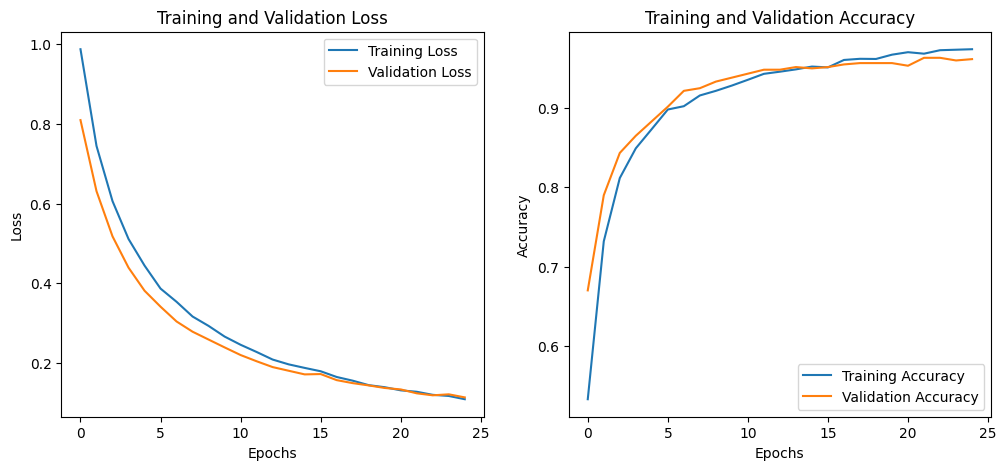

In [3]:
#Running a pre trained model on dataset 1 with the same architecture and hyperparameters as our model from scratch
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms
from torchvision.models import resnet18
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report


# Define hyperparameters
batch_size = 32  # Fixed batch size
learning_rate = 0.0001  # Fixed learning rate
epochs = 25

# Define data transformations
data_transform = transforms.Compose([
    transforms.ToPILImage(),  # Ensure input is a PIL image
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Apply transformations to your data
X_train_transformed = torch.stack([data_transform(x) for x in X_train])
X_val_transformed = torch.stack([data_transform(x) for x in X_val])
X_test_transformed = torch.stack([data_transform(x) for x in X_test])

# Convert data to PyTorch tensors
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader for training, validation, and test sets
train_dataset = TensorDataset(X_train_transformed, y_train_tensor)
val_dataset = TensorDataset(X_val_transformed, y_val_tensor)
test_dataset = TensorDataset(X_test_transformed, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define ResNet-18 model and device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, len(classes))
model = model.to(device)

from thop import profile
input = torch.randn(1, 3, 224, 224).to(device)
flops, params = profile(model, inputs=(input,))
print(f"FLOPs: {flops}")

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.6)

# Training and validation loop
train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    model.eval()
    val_running_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_loss = val_running_loss / len(val_loader)
    val_accuracy = correct_val / total_val
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

  

# Plotting Training and Validation Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()






Test Accuracy: 0.9700
Precision: 0.9707
Recall: 0.9706
F1 Score: 0.9707

Classification Report:

              precision    recall  f1-score   support

         MUS       0.96      0.96      0.96       219
        NORM       0.99      1.00      1.00       187
         STR       0.96      0.95      0.95       194

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



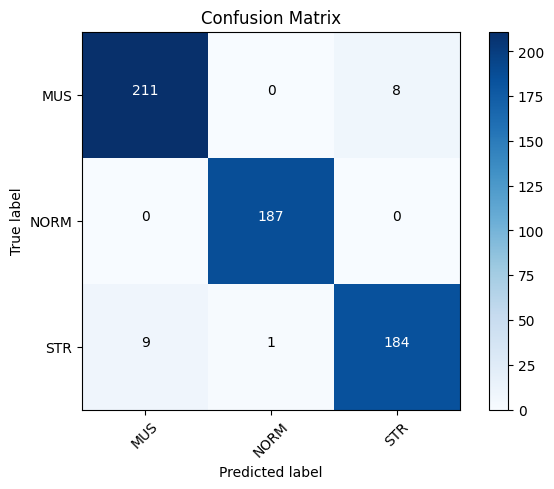

In [4]:
#test set evaluation for pretrained model
model.eval()
test_loss = 0
correct_test = 0
total_test = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_accuracy = correct_test / total_test
print(f'Test Accuracy: {test_accuracy:.4f}')
precision = precision_score(all_labels, all_preds, average='macro')
recall = recall_score(all_labels, all_preds, average='macro')
f1 = f1_score(all_labels, all_preds, average='macro')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(all_labels, all_preds, target_names=classes))

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Labeling the plot
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


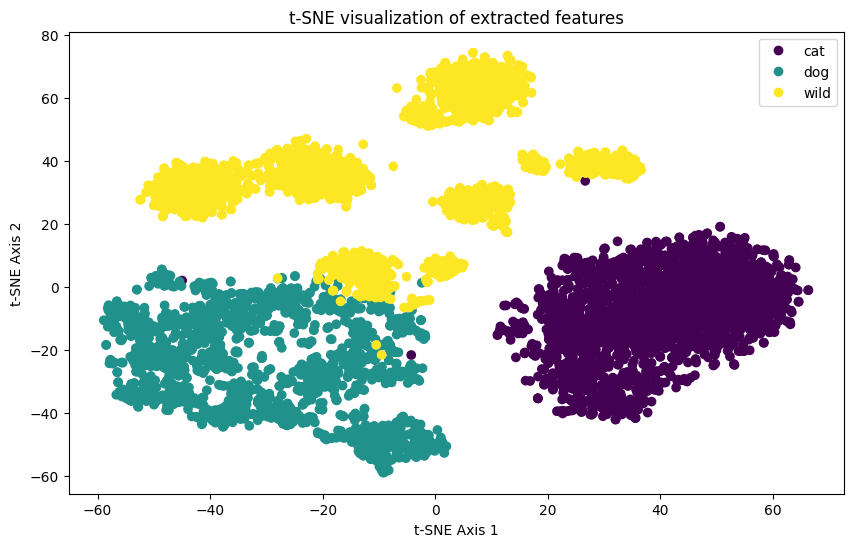

In [5]:
#Feature extraction using a RESNET18 pretrained model on dataset 3
import os
import cv2
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms, models
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load and preprocess the dataset
data_dir = '/kaggle/input/animal-faces/Dataset 3/Animal Faces'
classes = ['cat', 'dog', 'wild']
images = []
labels = []

for class_name in classes:
    class_path = os.path.join(data_dir, class_name)
    for filename in os.listdir(class_path):
        if filename.endswith('.jpg'):
            image_path = os.path.join(class_path, filename)
            image = cv2.imread(image_path, cv2.IMREAD_COLOR)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            images.append(image)
            labels.append(class_name)

X = np.array(images)
y = np.array(labels)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Define data transformations
data_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    
])

# Apply transformations to the entire dataset
X_transformed = torch.stack([data_transform(x) for x in X])
y_tensor = torch.tensor(y_encoded, dtype=torch.long)

# Convert data to PyTorch tensors
dataset = TensorDataset(X_transformed, y_tensor)
loader = DataLoader(dataset, batch_size=32, shuffle=False)

# Load the pre-trained ResNet-18 model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = models.resnet18(pretrained=True)
model = nn.Sequential(*list(model.children())[:-1])  # Remove the last classification layer
model = model.to(device)

# Feature Extraction
def extract_features(loader, model):
    model.eval()
    features = []
    labels = []

    with torch.no_grad():
        for inputs, y in loader:
            inputs = inputs.to(device)
            output = model(inputs)
            output = output.view(output.size(0), -1)  # Flatten the features
            features.extend(output.cpu().numpy())
            labels.extend(y.cpu().numpy())

    return np.array(features), np.array(labels)

# Extract features from the entire dataset
features, labels = extract_features(loader, model)

# t-SNE Visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(features)

# Plot t-SNE
plt.figure(figsize=(10, 6))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='viridis')
plt.title('t-SNE visualization of extracted features')
plt.xlabel('t-SNE Axis 1')
plt.ylabel('t-SNE Axis 2')
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.show()


Accuracy: 0.9058333333333334
Precision: 0.9059121745507884
Recall: 0.9086028443796517
F1 Score: 0.9065291944882189

Classification Report:
               precision    recall  f1-score   support

         MUS       0.92      0.85      0.88       437
        NORM       0.94      0.98      0.96       380
         STR       0.85      0.89      0.87       383

    accuracy                           0.91      1200
   macro avg       0.91      0.91      0.91      1200
weighted avg       0.91      0.91      0.91      1200



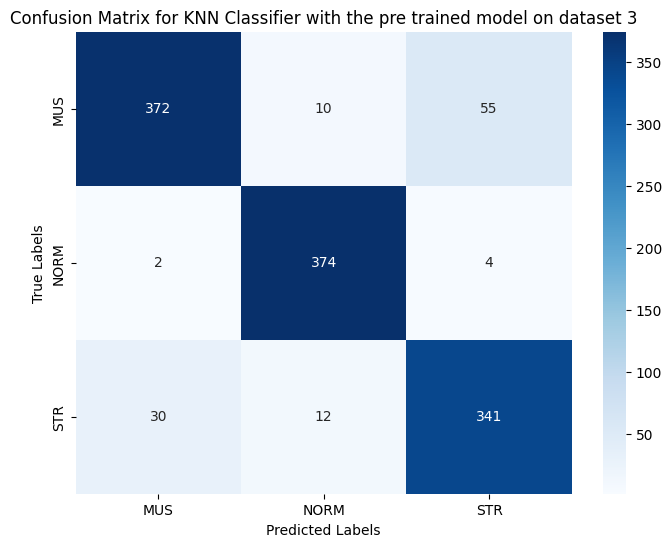

In [14]:
#Applying knn neighbours on the features extracted from dataset 3
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize the kNN Classifier
knn = KNeighborsClassifier(n_neighbors=10)

# Train the classifier
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
report = classification_report(y_test, y_pred, target_names=classes)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:\n", report)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for KNN Classifier with the pre trained model on dataset 3')
plt.show()




Accuracy: 0.925
Precision: 0.9259726002232146
Recall: 0.9260322875528019
F1 Score: 0.925995195554684

Classification Report:
               precision    recall  f1-score   support

         MUS       0.90      0.91      0.91       437
        NORM       0.98      0.98      0.98       380
         STR       0.90      0.89      0.89       383

    accuracy                           0.93      1200
   macro avg       0.93      0.93      0.93      1200
weighted avg       0.92      0.93      0.92      1200



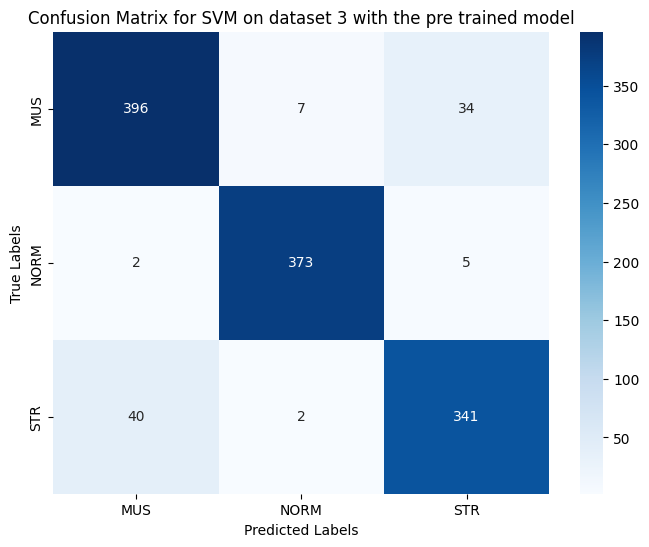

In [15]:
#Appling SVM on features extracted from dataset 2
# Extract features from the entire dataset
#features, labels = extract_features(loader, feature_extractor)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Import the SVM classifier
from sklearn.svm import SVC

# Initialize the SVM Classifier
svm = SVC(kernel='linear')  # You can change the kernel as needed

# Train the classifier
svm.fit(X_train, y_train)

# Predict on the test set
y_pred = svm.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
report = classification_report(y_test, y_pred, target_names=classes)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:\n", report)

cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM on dataset 3 with the pre trained model')
plt.show()


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


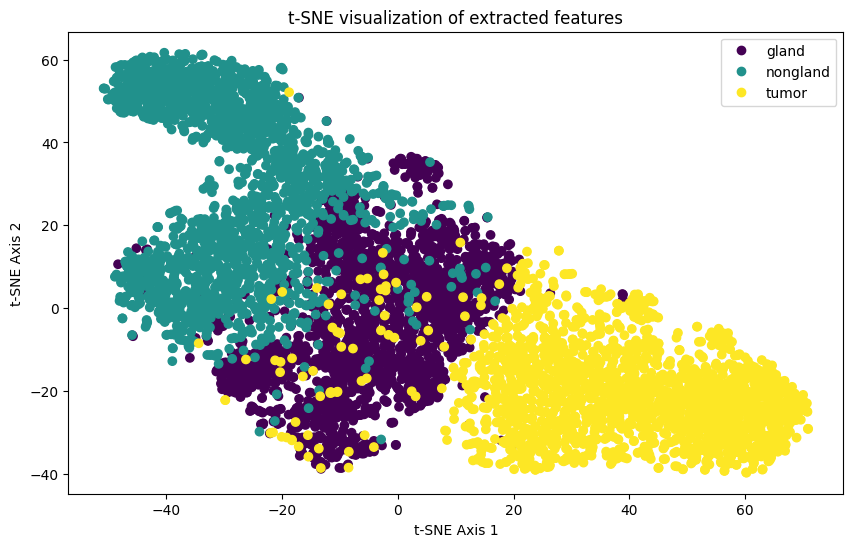

In [6]:
#Feature extraction using a RESNET18 pretrained model on dataset 2

import os
import cv2
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms, models
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load and preprocess the dataset
data_dir = '/kaggle/input/dataset2/Dataset 2/Prostate Cancer'
classes = ['gland', 'nongland', 'tumor']
images = []
labels = []

for class_name in classes:
    class_path = os.path.join(data_dir, class_name)
    for filename in os.listdir(class_path):
        if filename.endswith('.jpg'):
            image_path = os.path.join(class_path, filename)
            image = cv2.imread(image_path, cv2.IMREAD_COLOR)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            images.append(image)
            labels.append(class_name)

X = np.array(images)
y = np.array(labels)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Define data transformations
data_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    
])

# Apply transformations to the entire dataset
X_transformed = torch.stack([data_transform(x) for x in X])
y_tensor = torch.tensor(y_encoded, dtype=torch.long)

# Convert data to PyTorch tensors
dataset = TensorDataset(X_transformed, y_tensor)
loader = DataLoader(dataset, batch_size=32, shuffle=False)

# Load the pre-trained ResNet-18 model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = models.resnet18(pretrained=True)
model = nn.Sequential(*list(model.children())[:-1])  # Remove the last classification layer
model = model.to(device)

# Feature Extraction
def extract_features(loader, model):
    model.eval()
    features = []
    labels = []

    with torch.no_grad():
        for inputs, y in loader:
            inputs = inputs.to(device)
            output = model(inputs)
            output = output.view(output.size(0), -1)  # Flatten the features
            features.extend(output.cpu().numpy())
            labels.extend(y.cpu().numpy())

    return np.array(features), np.array(labels)

# Extract features from the entire dataset
features, labels = extract_features(loader, model)

# t-SNE Visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(features)

# Plot t-SNE
plt.figure(figsize=(10, 6))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='viridis')
plt.title('t-SNE visualization of extracted features')
plt.xlabel('t-SNE Axis 1')
plt.ylabel('t-SNE Axis 2')
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.show()


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


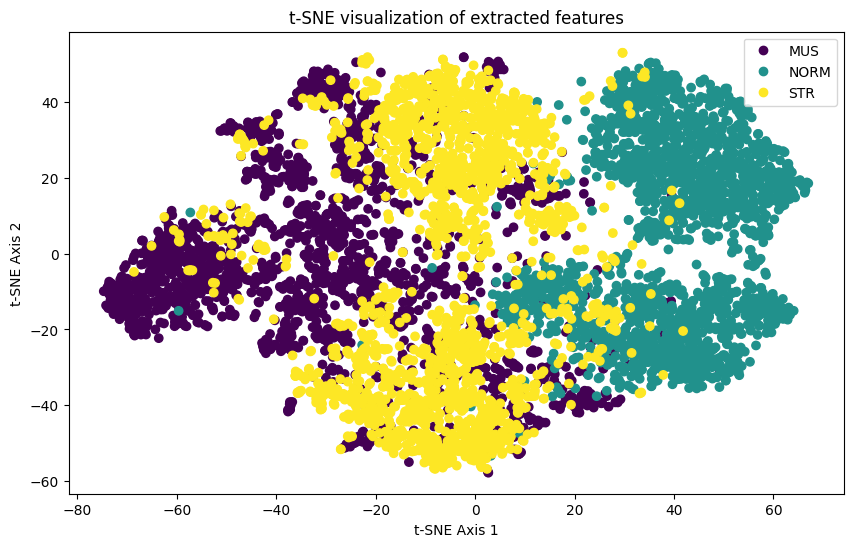

In [7]:
#Feature extraction using a RESNET18 pretrained model on dataset 1
import os
import cv2
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms, models
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load and preprocess the dataset
data_dir = '/kaggle/input/colorectal-canc/Dataset 1/Colorectal Cancer '
classes = ['MUS', 'NORM', 'STR']
images = []
labels = []

for class_name in classes:
    class_path = os.path.join(data_dir, class_name)
    for filename in os.listdir(class_path):
        if filename.endswith('.tif'):
            image_path = os.path.join(class_path, filename)
            image = cv2.imread(image_path, cv2.IMREAD_COLOR)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            images.append(image)
            labels.append(class_name)

X = np.array(images)
y = np.array(labels)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Define data transformations
data_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    
])

# Apply transformations to the entire dataset
X_transformed = torch.stack([data_transform(x) for x in X])
y_tensor = torch.tensor(y_encoded, dtype=torch.long)

# Convert data to PyTorch tensors
dataset = TensorDataset(X_transformed, y_tensor)
loader = DataLoader(dataset, batch_size=32, shuffle=False)

# Load the pre-trained ResNet-18 model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = models.resnet18(pretrained=True)
model = nn.Sequential(*list(model.children())[:-1])  # Remove the last classification layer
model = model.to(device)

# Feature Extraction
def extract_features(loader, model):
    model.eval()
    features = []
    labels = []

    with torch.no_grad():
        for inputs, y in loader:
            inputs = inputs.to(device)
            output = model(inputs)
            output = output.view(output.size(0), -1)  # Flatten the features
            features.extend(output.cpu().numpy())
            labels.extend(y.cpu().numpy())

    return np.array(features), np.array(labels)

# Extract features from the entire dataset
features, labels = extract_features(loader, model)

# t-SNE Visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(features)

# Plot t-SNE
plt.figure(figsize=(10, 6))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='viridis')
plt.title('t-SNE visualization of extracted features')
plt.xlabel('t-SNE Axis 1')
plt.ylabel('t-SNE Axis 2')
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.show()
